# Linear Model

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### 1. Linear Regression

##### 1-1. The Normal Equation

In [2]:
import numpy as np

# 예제 코드
np.random.seed(42)
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)  # randn: rand와 다른 난수 생성

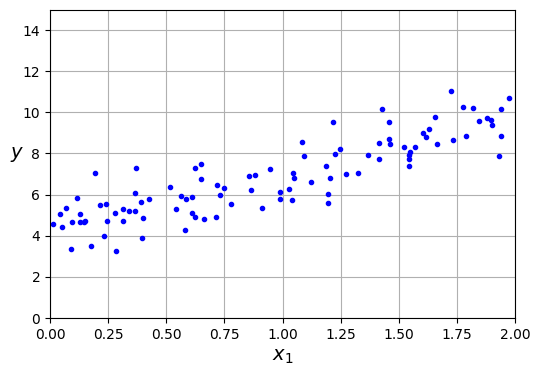

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])  # x_min, x_max, y_min, y_max
plt.grid()
plt.show()

In [7]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # 0열에 1 데이터 추가
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # @: 행렬 곱셈 연산자

[역행렬]
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi>A</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msup>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mi>a</mi>
      <mi>d</mi>
      <mo>&#x2212;</mo>
      <mi>b</mi>
      <mi>c</mi>
    </mrow>
  </mfrac>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mtable columnspacing="1em" rowspacing="0.9em 0.9em">
      <mtr>
        <mtd>
          <mi>d</mi>
        </mtd>
        <mtd>
          <mo>&#x2212;</mo>
          <mi>b</mi>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mo>&#x2212;</mo>
          <mi>c</mi>
        </mtd>
        <mtd>
          <mi>a</mi>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math>

In [8]:
print(theta_best)

[[4.21509616]
 [2.77011339]]


In [28]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

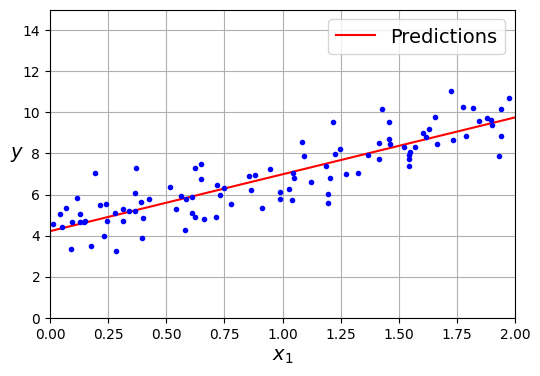

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [31]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [32]:
# 최소 제곱(least squares) 함수
# theta_hat = X†y
# X†: 유사역행렬(무어 펜로즈 역행렬)
# 역행렬은 full rank인 n x n 정방 행렬에서만 정의
# 정방 행렬이 아닌 모양의 행렬에서는 유사 역행렬을 정의
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)  
theta_best_svd

array([[4.21509616],
       [2.77011339]])

- 다음 4가지 조건을 만족하는 행렬 A†가 무어-펜로즈 유사 역행렬

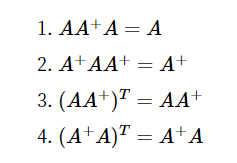

- 특이값 분해(SVD)를 이용하면 쉽게 계산할 수 있음

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>A</mi>
  <mo>=</mo>
  <mi>U</mi>
  <mi mathvariant="normal">&#x3A3;</mi>
  <msup>
    <mi>V</mi>
    <mi>T</mi>
  </msup>
</math>

- 여기서 U는 m X m 직각 행렬, V는 n X n 직각 행렬이므로 다음을 만족

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi>U</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msup>
  <mo>=</mo>
  <msup>
    <mi>U</mi>
    <mi>T</mi>
  </msup>
  <mo>,</mo>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
  <mtext>&#xA0;</mtext>
  <msup>
    <mi>V</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msup>
  <mo>=</mo>
  <msup>
    <mi>V</mi>
    <mi>T</mi>
  </msup>
</math>

-  ∑ 표현

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi mathvariant="normal">&#x3A3;</mi>
  <mo>=</mo>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mtable columnspacing="1em" rowspacing="4pt">
      <mtr>
        <mtd>
          <msub>
            <mi mathvariant="normal">&#x3A3;</mi>
            <mi>r</mi>
          </msub>
        </mtd>
        <mtd>
          <msub>
            <mn>0</mn>
            <mrow data-mjx-texclass="ORD">
              <mi>r</mi>
              <mo>&#xD7;</mo>
              <mo stretchy="false">(</mo>
              <mi>n</mi>
              <mo>&#x2212;</mo>
              <mi>r</mi>
              <mo stretchy="false">)</mo>
            </mrow>
          </msub>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <msub>
            <mn>0</mn>
            <mrow data-mjx-texclass="ORD">
              <mo stretchy="false">(</mo>
              <mi>m</mi>
              <mo>&#x2212;</mo>
              <mi>r</mi>
              <mo stretchy="false">)</mo>
              <mo>&#xD7;</mo>
              <mi>r</mi>
            </mrow>
          </msub>
        </mtd>
        <mtd>
          <msub>
            <mn>0</mn>
            <mrow data-mjx-texclass="ORD">
              <mo stretchy="false">(</mo>
              <mi>m</mi>
              <mo>&#x2212;</mo>
              <mi>r</mi>
              <mo stretchy="false">)</mo>
              <mo>&#xD7;</mo>
              <mo stretchy="false">(</mo>
              <mi>n</mi>
              <mo>&#x2212;</mo>
              <mi>r</mi>
              <mo stretchy="false">)</mo>
            </mrow>
          </msub>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math>

- 유사 역행렬

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msup>
    <mi>A</mi>
    <mo>+</mo>
  </msup>
  <mo>=</mo>
  <mi>V</mi>
  <msup>
    <mi mathvariant="normal">&#x3A3;</mi>
    <mo>+</mo>
  </msup>
  <msup>
    <mi>U</mi>
    <mi>T</mi>
  </msup>
</math>

- 정규 방적식보다 효율적이며 특정한 경우 정규방정식이 작동하지 않으나 유사역행렬은 항상 구할 수 있음

In [33]:
# 유사 역행렬 pinv
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

##### 1-2. 계산 복잡도
- 정규방정식은 (n+1) X (n+1) 크기의 (X_transpose @ X) 역행렬 계산
- 역행렬 계산 복잡도는 일반적으로 O(n^2.4), O(n^3)사이
- 즉 특성 수가 두 배로 늘어나면 시간 계산이 5.3에서 8배 늘어남
- 사이킷런의 LinearRegression의 경우 SVD방법이 약 O(n^2)
- 정규방정식과 SVD 방법 모두 특성 수가 많아지면 매우 느려짐

### 2. Gradient Descent
- 경사 하강법(GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 적절한 learning rate

- 문제
    - 전역 최솟값보다 덜 좋은 지역 최솟값 수렴 문제
    - 모든 특성이 같은 스케일을 가져야 함(시간 문제)

- 다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수
- 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 의미

##### 2-1. Batch Gradient Descent
- 경사 하강법을 구현하려면 각 모델 파라미터에 대해 비용 함수의 그레이디언트를 계산(편도함수)

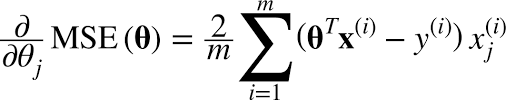

- 비용 함수의 그레이디언트 벡터

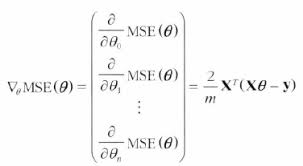

[CAUTION]
- 이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산
- 그래서 이 알고리즘을 배치 경사 하강법이라고 부름
- 이런 이유로 매우 큰 훈련 세트에서는 아주 느림
- 그러나 경사 하강법은 특성 수에 민감하지 않음
- 수십만 개의 특성에서 선형 회귀를 훈련시키려면 
- 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠름

In [34]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)  # 초기 파라미터 설정

for epochs in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [35]:
theta

array([[4.21509616],
       [2.77011339]])

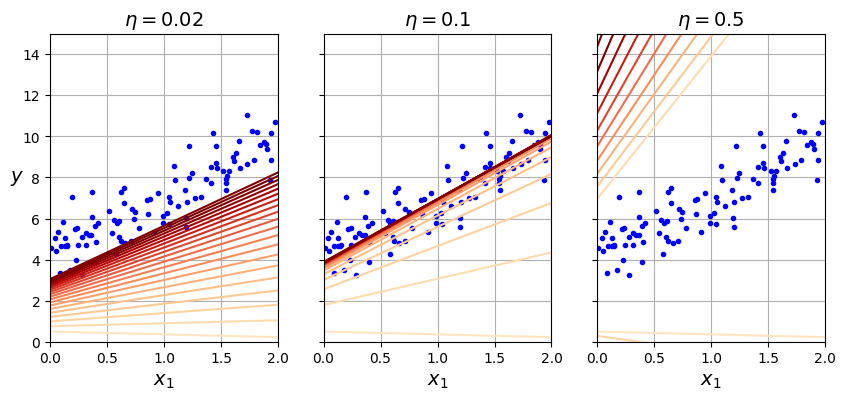

In [36]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle='solid', color=color)

        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel('$x_1$')
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr'$\eta = {eta}$')
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  #

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

- 왼쪽은 학습률이 너무 낮아 최적점에 도달하려면 시간이 오래 걸림
- 가운데는 학습률이 적당해 보임
- 오른쪽은 학습률이 높아서 발산

##### 2-2. Stochastic Gradient Desent
- 배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 점
- SGD는 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트 계산
- 알고리즘이 훨씬 빠르며 매우 큰 훈련 세트도 훈련시킬 수 있음
- 반면, 확률적(무작위)이므로 배치 경사 하강법보다 훨씬 불안정함
- 비용 함수가 최솟값에 다다를 때까지 위아래로 요동치며 평균적으로 감소
- 시간이 지나면 요동이 지속되면서 최솟값의 근사치에 도달
- 최적치가 아니지만 지역 최솟값에서 탈출을 시켜주지만 전역 최솟값에 다다르지는 못함
- 이를 해결하기 위해 시작할 때는 학습률을 크게 하고 점차 작게 줄여나감
- 담금질 기법 알고리즘과 유사
- 매 반복에서 학습률을 결정하는 함수를 학습 스케줄
- 학습률이 너무 빨리 줄면 지역 최솟값에 갇히거나 중간에 멈춰버림
- 학습률이 너무 천천히 줄면 오랫동안 최솟값 근처를 맴돌거나 훈련을 너무 일찍 중지할 수 있음

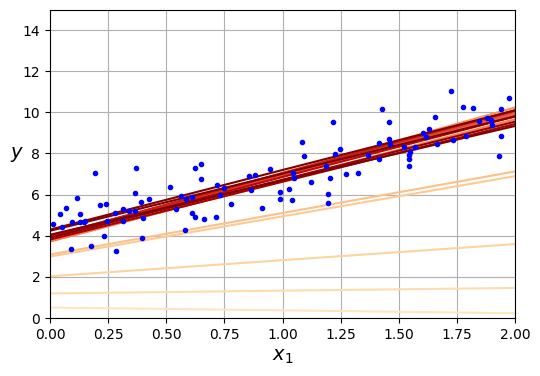

In [41]:
# SGD 구현
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

# figure
theta_path_sgd = []
n_shown = 20
plt.figure(figsize=(6,4))

for epoch in range(n_epochs):
    for iteration in range(m):

        # generate figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @  theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

- 경사 하강법의 첫 20개 스텝

In [38]:
theta

array([[4.21076011],
       [2.74856079]])

- 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에 여러번 선택되거나 선택되지 못 할 수도 있음
- 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞어야 함
- 그러나 이렇게 하면 보통 더 늦게 수렴

[CAUTION]
- 확률적 경사 하강법은 훈련 샘플이 IID(independent and identically distributed)를 만족해야 평균적으로 파라미터가 전역 최적점을 향해 진행
- 훈련 샘플을 섞기
- 만약 레이블 순서대로 정렬된 샘플을 섞지 않은 채 사용하면 한 레이블에 최적화하고 두 번째 레이블에 최적화하며 최적점에 도달하지 못 함

In [48]:
# 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면
# 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
# 최대 1000번 실행되며
# 한 에포크에서 0.001보다 손실이 줄어들 때까지 실행
# 학습률 0.1로 기본 학습 스케줄 사용
# 규제는 사용하지 않음 

sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [40]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19984658]), array([2.73198364]))

##### 2-3. Mini-batch Gradient Descent

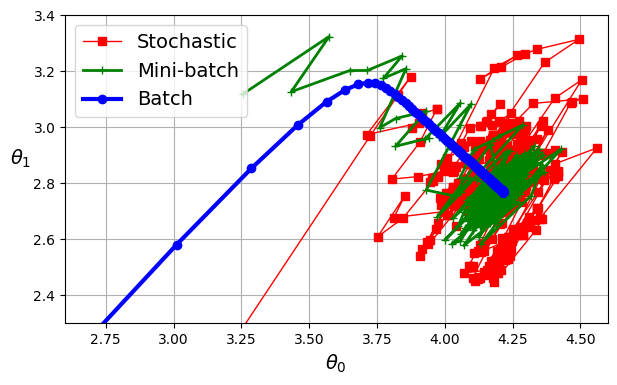

In [42]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)  # 0부터 m까지 인덱스 무작위로 섞기
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

### 3. Polynomial Regression

In [29]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

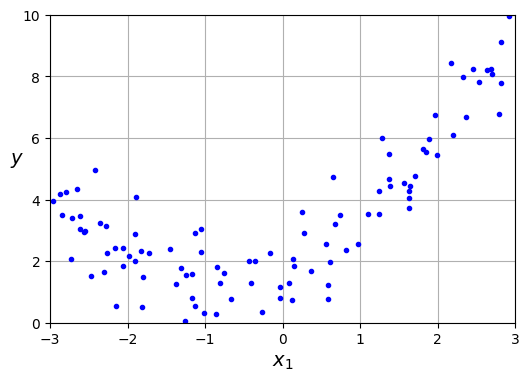

In [30]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# degree: 생성할 다항식의 최고 차수
# include_bias: 상수항을 생성할지 여부
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
# X가 [a, b] 형태의 1차원 배열일 때
# 2차원 다항식을 생성하면 [a, b, a^2, b^2]과 같은 형태의 다항식 특성 생성
X[0]

array([-0.75275929])

In [32]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

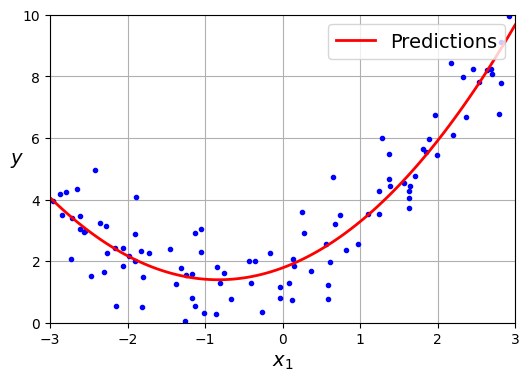

In [34]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)  # linspace: 주어진 구간에 등간격으로 나눈 값을 생성
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper right')
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

### 4. 학습 곡선

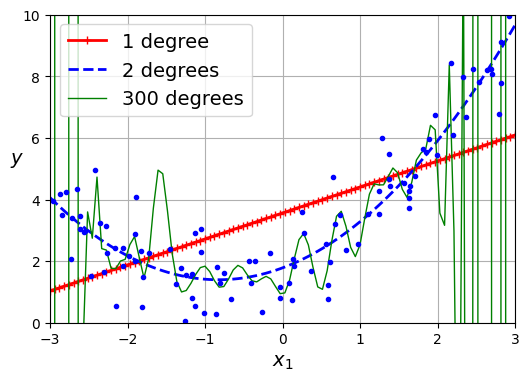

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6,4))

for style, width, degree in (('r-+', 2, 1), ('b--', 2, 2), ('g-', 1, 300)):
    polybig_feature = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_feature, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

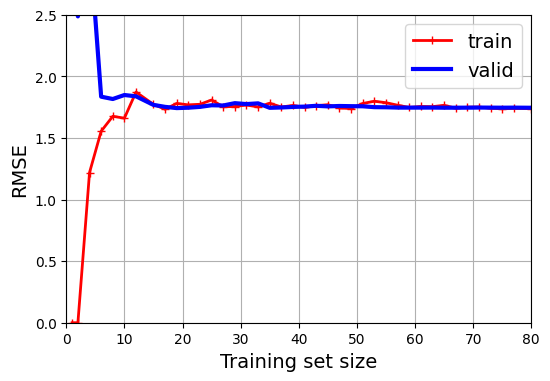

In [37]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), 
                                                         X, 
                                                         y, 
                                                         train_sizes=np.linspace(0.01, 1.0, 40),
                                                         cv=5, 
                                                         scoring='neg_root_mean_squared_error')

# np.linspace(0.01, 1, 40): 데이터의 1%부터 100%까지 40단계로 나누어 사용
# sciki-learn의 교차 검증 점수는 더 높을 수록 좋은 성능으로 인식하므로
# 점수가 낮을 수록 좋은 RMSE, MSE의 값은 음수로 표현

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')

plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='upper right')
plt.axis([0, 80, 0, 2.5])
plt.show()

- RMSE의 값이 1.8정도에서 형성되어 있으므로 과소적합 되어 있음.
- 과소적합을 해결하기 위해서는 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 함.


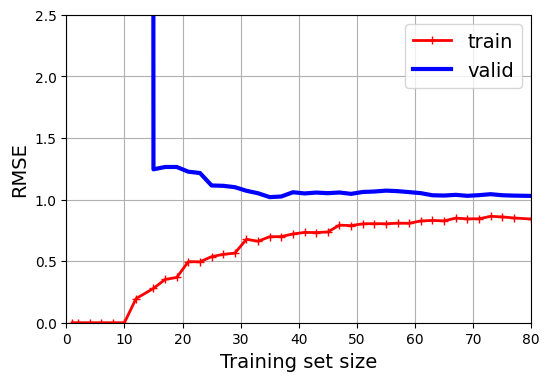

In [40]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, 
                                                         X,
                                                         y, 
                                                         train_sizes=np.linspace(0.01, 1, 40), 
                                                         cv=5, 
                                                         scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.legend(loc='upper right')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()


- RMSE의 값이 이전 모델보다 낮아짐

- train data에서 RMSE의 값이 더 낮고, valid data와 차이를 보이므로 과대적합 의심
- 편향-분산 trade off
    - 모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어듦
    - 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아짐

### 5. 규제가 있는 선형 모델
- 과대적합을 감소시키는 방법 중 하나는 모델을 규제하는 것

##### 5-1. 릿지 회귀
- 릿지 회귀 또는 티호노프 규제

- 규제항을 비용 함수에 추가

- 규제항은 훈련하는 동안에만 비용 함수에 추가되며, 훈련이 끝나면 규제가 없는 지표로 성능 평가

- 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요

- 릿지 회귀의 비용 함수

![비용 함수](https://blog.kakaocdn.net/dn/phZk0/btq3DwvcSNQ/zyrunIPkBktf0S3i0kQ0fK/img.png)

In [41]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

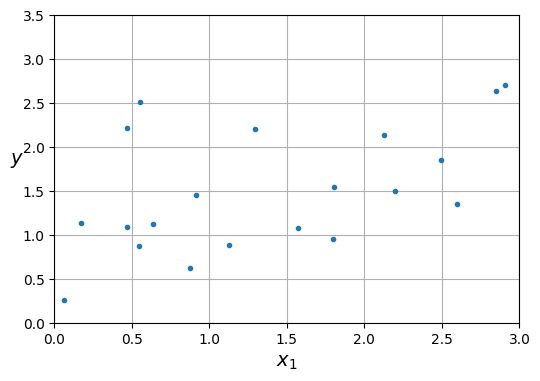

In [42]:
plt.figure(figsize=(6,4))
plt.plot(X, y, '.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [43]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

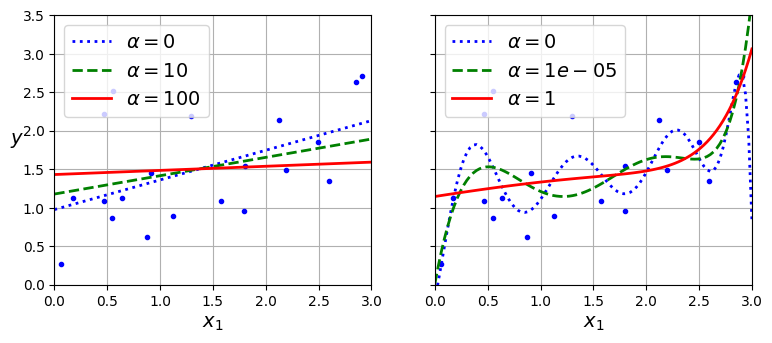

In [44]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, 'b.', linewidth=3)
    for alpha, style in zip(alphas, ('b:', 'g--', 'r-')):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(), 
                model)
            
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2, 
                 label=fr'$\alpha = {alpha}$')
        plt.legend(loc='upper left')
        plt.xlabel('$x_1$')
        plt.axis([0, 3, 0, 3.5])
        plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel('$y$', rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [50]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')  # penalty: 규제
                                      # l2: 비용 함수에 가중치 벡터의 l2 노름의 제곱을 2로 나눈 규제항 추가
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46728082])

##### 5-2. 라쏘 회귀
- least absolute shrinkage and selection operator(Lasso)